### Executive Summary:
In this exercise the quick sort algorithm is examined by using it to sort a list of randomly generated names by first name, last name, and state. A quick sort algorithm basically works by sorting an array through partitioning the array based on a pivot, then sorts the partitions by being called recursively, and are combined after to get the sorted array. Quicksort can run much faster than other sorting algorithms such as selection sort. The basis of a quick sort algorithm utilizes recursion, an important method for creating clear solutions, providing effiency, and increasing programmer performance. It is useful to the data engineer, as using a quick sort algorithm is one use case that proves to be effective, and one that can also increase program performance as well. It is recommended that for scenarios that require an efficient sorting method, that a quick sort algorithm be used.

Quicksort was compared with two other sorting algorithms: merge sort and insertion sort. A merge sort algorithm, similar to quicksort, basically splits an array into two halves, calls itself recursively for the two halves, and then combines the two sorted sub-arrays. Insertion sort, on the other hand, sorts the array one at a time where the items are compared with each other sequentially, and then arranged simultaneously. Further explanation on how these algorithms work are explained in this exercise, and how they relate to Big O notation is discussed. With regards to its simplicity, efficiency, and performance, the quick sort algorithm showed the best results.     

### Import Libraries:

In [1]:
#For math
import numpy as np
#For data
import pandas as pd
#For Plotting
import matplotlib.pyplot as plt
# Random generator
import random
# Timer
from timeit import default_timer as timer
#for string conversions
import string

### Define Functions  Quicksort, Mergesort, and Insertion Sort :

### Quick Sort Function for Arrays:
 - A quick sort algorithm basically works by picking a pivot, then it will partition the array into two sub-arrays: items less that the pivot and items greater than the pivot. Then quicksort will be called recursively on the two subarrays. The subarrays are then combined to get a sorted array [1].
 - As shown below, the quicksort algorithm is simple, and coded for efficiency.
 - Quicksort uses a method called "Divide and Conquer". The two steps involved are figuring out the base case, and then divide or decrease the problem until it becomes the base case [1].
 - Quicksort in the average case (the average case is the best case), takes **O(*n log n*)** time. However, at its worst case, quicksort takes **O(*n^2*)** time. Performance heavily depends on the location of the pivot.
 - Big O notation in the average case is **O(*n log n*)**, as since it pivots and partitions the array, there are **O(*log n*)** levels or call stacks (as it works similar to binary search). Sorting through the levels take **O(*n*)** time. Therefore, it takes **O(*n*)** x **O(*log n*)** = **O(*n log n*)** time on average.
 - Quicksort has a smaller constant, or the fixed amount of time the algorithm takes, than merge sort. In the case of quicksort versus mergesort, the constant makes a difference. Therefore, in the average case, quicksort is faster.
 - In contrast to selection sort, quicksort is used in "real life". 

In [94]:
# Quick sort function to list
def quick_sort(array):
    to_list = list(array)
    if len(to_list) < 2:
    # base case, arrays with 0 or 1 element are already "sorted"
        return to_list
    else:
    # recursive case
        pivot = to_list[0]
    # sub-array of all the elements less than the pivot
        less = [i for i in to_list[1:] if i <= pivot]
    # sub-array of all the elements greater than the pivot
        greater = [i for i in to_list[1:] if i > pivot]
        return quick_sort(less) + [pivot] + quick_sort(greater)

# Quick sort function to array
def quick_sort_array(array):
    return(np.asarray(quick_sort(array))) 

### Merge Sort Function For Arrays:
 - Merge sort divides the array into two halves, calls itself recursively for the two halves, and then merges the two sorted halves, or sub-arrays, into a completed array [2].
 - Like quicksort, merge sort is a "Divide and Conquer" algorithm.
 - As shown below, the code for the merge sort algorithm is a little more complex than the code for quicksort.
 - Big O notation as **O(*n log n*)**. 
 - In contrast to quicksort, merge sort always takes **O(*n log n*)** time.
 - However, merge sort has a longer constant than quicksort.
 

In [3]:
#Merge sort function

# Merge function
def merge(left, right):
    #Merge sort merging function

    left_index, right_index = 0, 0
    result = []
    while left_index < len(left) and right_index < len(right):
        if left[left_index] < right[right_index]:
            result.append(left[left_index])
            left_index += 1
        else:
            result.append(right[right_index])
            right_index += 1

    result += left[left_index:]
    result += right[right_index:]
    return result

# Merge sort function from to list
def merge_sort(array):
    #Merge sort algorithm implementation
    to_list = list(array)
    if len(to_list) <= 1:  # base case
        return to_list

    # Divide array in half and merge sort recursively
    else:
        half = len(to_list) // 2
        left = merge_sort(to_list[:half])
        right = merge_sort(to_list[half:])
        merged = merge(left, right)
    return merged

# Merge sort function to array
def merge_sort_array(array):
    return(np.asarray(merge_sort(array)))    

### Insertion Sort Function: 
 - Insertion sort is a method where the sorted array is built one item at a time. The array items are compared with each other sequentially, and then arranged simultaneously in the specified order [3].
 - A simple analogy is that it is similar to arranging a deck of cards.
 - Contrary to quicksort and merge sort, insertion sort is not a "Divide and Conquer" algorithm. 
 - However, the insertion sort algorithm is different from selection sort, as it does not find the smallest number and add it to a new array. Rather, it maintains a sorted sublist in the lower positions of the list, and for each new item, it is inserted into the sublist by comparison through shifting until the whole list is sorted [4]. 
 - Big O notation as **O(*n^2*)** time as insertion sort passes through n-1 items to sort n items. In other words, it takes **O(*n x n*)** time to get through the list.
 - In many cases, such as lists that have a small n, insertion sort shows good performance, and it is better than selection sort. 

In [4]:
#Insertion sort function to list
def insertion_sort(array):
    to_list = list(array)
    for index in range(len(to_list)):
        currentvalue = to_list[index]
        position = index
    
        while position > 0 and to_list[position-1] > currentvalue:
            to_list[position] = to_list[position-1]
            position = position-1

        to_list[position] = currentvalue
    return to_list

#Insertion sort function to array
def insertion_sort_array(array):
    return(np.asarray(insertion_sort(array)))

### Create Random First Names, Last Names, and Address (Unique State): 

In [5]:
# Create array of random first names
firstnames = []
for i in range(1, 51):
    firstname = []
    for e in range(1, 11):
        firstname.append(random.choice(string.ascii_letters.lower()))
    firstname = ''.join(firstname)
    firstnames.append(firstname)
firstnames = np.asarray(firstnames)

In [63]:
# Check for duplicates
print('Duplicates:', pd.DataFrame(firstnames).duplicated().sum())

Duplicates: 0


In [13]:
# Create array of random last names
lastnames = []
for i in range(1, 51):
    lastname = []
    for e in range(1, 11):
        lastname.append(random.choice(string.ascii_letters.lower()))
    lastname = ''.join(lastname)
    lastnames.append(lastname)
lastnames = np.asarray(lastnames)

In [64]:
# Check for duplicates
print('Duplicates:', pd.DataFrame(lastnames).duplicated().sum())

Duplicates: 0


In [16]:
# Create array of random states with no repetitions
states = np.array(["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"])

random.seed(58)
staterandom = random.sample(range(0, 50), 50)

address = []
for i in range(len(staterandom)):
    address.append(states[staterandom[i]])
address = np.asarray(address)

In [62]:
# Check for duplicates
print('Duplicates:', pd.DataFrame(address).duplicated().sum())

Duplicates: 0


### Create Data Frame of Random Names and Addresses (Unsorted List):

In [106]:
people_df = pd.DataFrame(np.array([firstnames,lastnames, address])).transpose() 
people_df = people_df.rename(columns={0:'First_Name', 1:'Last_Name', 2:'Address'})
print('Duplicates:', people_df.duplicated().sum())
people_df

Duplicates: 0


,First_Name,Last_Name,Address
0,rcaamxkiio,oxdjabzzon,PA
1,ppsiqmgxxg,dwvoziycqo,IL
2,kuhcyxvwtn,rzbxaudozf,IN
3,jmsnnvuapq,bylnlldjps,TN
4,fhkxsfdfjz,ynxupdauos,WI
5,ekiwnfdjes,acoveymora,AZ
6,fiwtfgdsds,kzszqiklbs,VA
7,qglyhibmgq,btvtosdggt,NH
8,ebsfmtanoe,fqxfxtfdwm,MT
9,lrdaxgrttn,ylexzhfpci,MN


### Sort by First Name Using Quick Sort with Execution Time Noted:
 - As shown below quicksort works relatively fast, and will hit the average case way more often than the worst case.

In [108]:
# Quick sort with execution time noted
start = timer()
quick_sorted = quick_sort_array(people_df['First_Name'])
end = timer()
execution_time_quick = (end-start)*1000
print('Quick Sort Execution Time (ms):', execution_time_quick)

Quick Sort Execution Time (ms): 0.3040999999939231


### Output of Sorted Result in Data Frame

In [130]:
quicksort_df = pd.DataFrame(quick_sorted)
quicksort_df = quicksort_df.rename(columns={0:'First_Name'})
quicksort_df = quicksort_df.merge(people_df, how='left', on='First_Name')

print('Duplicates:', quicksort_df.duplicated().sum())
quicksort_df

Duplicates: 0


,First_Name,Last_Name,Address
0,agwhfiqtlv,vghuudsstw,MO
1,asmkazmtjc,fvfapnyupn,NY
2,brleddjvbu,lsazbkyksp,NC
3,bzvqgjwxdv,pyzfahdzax,CO
4,cjgdnnutzt,wdixcbzxkp,IA
5,cvcehdtdtb,lqufcblqjc,CA
6,dajsugxbwe,pixlmmympc,OR
7,dbmvxyivmx,ftsgzwfyjp,VT
8,dnbuhrdget,mefitwvulm,WY
9,dysdmqpknc,lthnhuoxcw,NV


In [128]:
# Sanity check
if (people_df.sort_values(by='First_Name').reset_index(drop=True) == quicksort_df)['Address'].count() == 50:
    print('All Data Matches')

All Data Matches


### Sort by First Name Using Other Sorting Algorithms with Execution Time Noted: 

### Merge Sort:
 - Merge sort runs relatively fast as well, but not as fast as quicksort due to a longer constant.

In [148]:
# Merge sort with execution time noted
start = timer()
merge_sorted = merge_sort_array(people_df['First_Name'])
end = timer()
execution_time_merge = (end-start)*1000
print('Merge Sort Execution Time (ms):', execution_time_merge)

Merge Sort Execution Time (ms): 0.4433999993125326


### Insertion Sort:
 - Insertion sort does not run as slow as expected, but is slower than the other two due to it taking **O(*n^2*)** time.
 - When compared to selection sort, insertion sort runs much faster.

In [140]:
# Insertion sort with execution time noted
start = timer()
insertion_sorted = insertion_sort_array(people_df['First_Name'])
end = timer()
execution_time_insertion = (end-start)*1000
print('Insertion Sort Execution Time (ms):', execution_time_insertion)

Insertion Sort Execution Time (ms): 0.750500000322063


### Table of Execution Times (Quick Sort, Merge Sort, Insertion Sort):
 - In comparing the 3 execution times it is apparent that quicksort is the better or the three.
 - In terms of milliseconds the differences do not seem as significant, it is assumed that with larger data sets the difference in run times would matter a great deal.

In [149]:
#Table of execution times
execution_times_df = pd.DataFrame(np.array([['Quick Sort', execution_time_quick],['Merge Sort', execution_time_merge]
                                            , ['Insertion Sort', execution_time_insertion]]), columns=['Sort Algorithm',
                                                                                                      'Execution Time'])
execution_times_df

,Sort Algorithm,Execution Time
0,Quick Sort,0.3040999999939231
1,Merge Sort,0.4433999993125326
2,Insertion Sort,0.750500000322063


### Plot of Execution Times by Sorting Algorithm:
 - By examining a plot of execution times, the differences are more pronounced than when comparing the times in the table above.
 - With the significant differences it is recommended that a quicksort algorithm is used. It is simple, efficient, and it performs well. It is advantageous for the data engineer to implement such algorithm.
 - Longer run times affect overall program performance and client satisfaction.

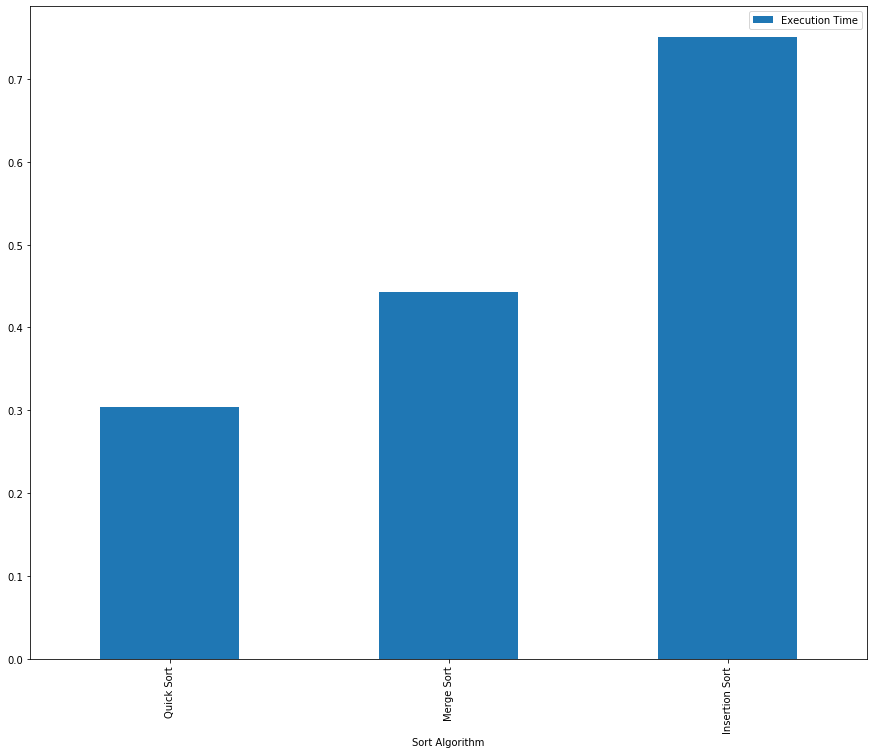

In [159]:
#Plot of execution times
execution_times_df['Execution Time'] = execution_times_df['Execution Time'].astype(float)
execution_times_pivot = pd.pivot_table(execution_times_df, 
                                       index=execution_times_df['Sort Algorithm']).sort_values(by='Execution Time')
execution_times_plot = execution_times_pivot.loc[:,['Execution Time']].plot.bar(stacked=False, figsize=(15,12))

### Conclusion:
In this exercise the quick sort algorithm was examined by using it to sort a list of randomly generated names by first name, last name, and state. A quick sort algorithm is a "Divide and Conquer" algorithm, which basically works by sorting an array through partitioning the array based on a pivot, then sorts the partitions by being called recursively, and are combined after to get the sorted array. The basis of a quick sort algorithm utilizes recursion, an important method for creating clear solutions, providing effiency, and increasing programmer performance. It is useful to the data engineer, as using a quick sort algorithm is one use case that proves to be effective, and one that can also increase program performance as well.

Quicksort was compared with two other sorting algorithms: merge sort and insertion sort. A merge sort algorithm, similar to quicksort, is also a "Divide and Conquer" algorithm, which basically splits an array into two halves, calls itself recursively for the two halves, and then combines the two sorted sub-arrays. Insertion sort, on the other hand, sorts the array one at a time where the items are compared with each other sequentially, and then arranged simultaneously. In Big O notation, insertion sort takes **O(*n^2*)** time. Quicksort, on average, will take **O(*n log n*)** time. However, at its worst case, quicksort can take **O(*n^2*)** time depending on the location of the pivot. In contrast, merge sort always takes **O(*n log n*)** time, yet it has a longer constant than quicksort. Therefore, quicksort is the preferred method of choice, as it will complete in **O(*n log n*)** time on average, and has a smaller constant. With regards to its simplicity, efficiency, and performance, it is recommended that the quick sort algorithm is used based on the results. 


### References:
[1] Bhargava, A. Y.(2016.) Grokking Algorithms: An Illustrated Guide for Programmers and Other Curious People. Shelter Island, N.Y.: Manning.

[2] https://www.geeksforgeeks.org/merge-sort/

[3] https://www.interviewbit.com/tutorial/insertion-sort-algorithm/

[4] https://runestone.academy/runestone/books/published/pythonds/SortSearch/TheInsertionSort.html